### Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.
Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
This would be helpful if we are to train our model to take NLP inputs.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime
from pylab import *
import matplotlib.pyplot as plotter
os.chdir('D:\downloads')
shares=pd.read_csv('Week2.csv')
shares['Date'].describe()
shares['Date']=shares['Date'].astype('datetime64[ns]')
shares.set_index('Date')
shares
x=shares['Date']
y=shares['Close Price']
plt.plot(x,y)

C:\Users\prash\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [3]:
shares.Date

0     2017-05-15
1     2017-05-16
2     2017-05-17
3     2017-05-18
4     2017-05-19
5     2017-05-22
6     2017-05-23
7     2017-05-24
8     2017-05-25
9     2017-05-26
10    2017-05-29
11    2017-05-30
12    2017-05-31
13    2017-06-01
14    2017-06-02
15    2017-06-05
16    2017-06-06
17    2017-06-07
18    2017-06-08
19    2017-06-09
20    2017-06-12
21    2017-06-13
22    2017-06-14
23    2017-06-15
24    2017-06-16
25    2017-06-19
26    2017-06-20
27    2017-06-21
28    2017-06-22
29    2017-06-23
         ...    
464   2019-03-27
465   2019-03-28
466   2019-03-29
467   2019-04-01
468   2019-04-02
469   2019-04-03
470   2019-04-04
471   2019-04-05
472   2019-04-08
473   2019-04-09
474   2019-04-10
475   2019-04-11
476   2019-04-12
477   2019-04-15
478   2019-04-16
479   2019-04-18
480   2019-04-22
481   2019-04-23
482   2019-04-24
483   2019-04-25
484   2019-04-26
485   2019-04-30
486   2019-05-02
487   2019-05-03
488   2019-05-06
489   2019-05-07
490   2019-05-08
491   2019-05-

### Query 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

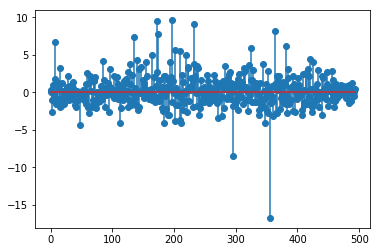

In [5]:
plt.stem(shares['Day_Perc_Change'])

### Query 2.3 
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

<StemContainer object of 3 artists>

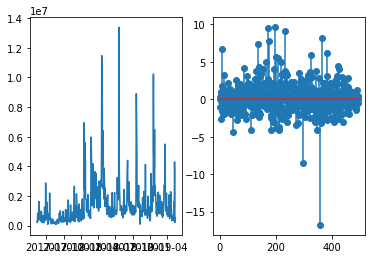

In [34]:
shares
y=shares['Total Traded Quantity']
x=shares['Date']
plt.subplot(1,2,1)
plt.plot(x,y)
plt.subplot(1,2,2)
plt.stem(shares['Day_Perc_Change'])

### Query 2.4 
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 

<BarContainer object of 9 artists>

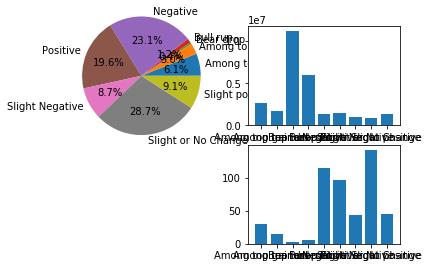

In [114]:
grp=shares.groupby(['Trend'])
a=grp['Date'].count()
plt.subplot(2,2,1)
plt.pie(a,labels=a.index,autopct="%1.1f%%",radius=1.5)
avg=grp['Total Traded Quantity'].mean()
median=grp['Total Traded Quantity'].describe(percentiles=[.5])
plt.subplot(2,2,2)
plt.bar(avg.index,avg)
plt.subplot(2,2,4)
plt.bar(median.index,median['count'])

### Query 2.5 
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6.,  3.,
        16., 18., 36., 56., 48., 73., 70., 49., 33., 25., 17., 13.,  9.,
         5.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  0.,  3.]),
 array([-16.77488624, -16.24713794, -15.71938964, -15.19164135,
        -14.66389305, -14.13614475, -13.60839645, -13.08064815,
        -12.55289985, -12.02515155, -11.49740326, -10.96965496,
        -10.44190666,  -9.91415836,  -9.38641006,  -8.85866176,
         -8.33091346,  -7.80316517,  -7.27541687,  -6.74766857,
         -6.21992027,  -5.69217197,  -5.16442367,  -4.63667537,
         -4.10892707,  -3.58117878,  -3.05343048,  -2.52568218,
         -1.99793388,  -1.47018558,  -0.94243728,  -0.41468898,
          0.11305931,   0.64080761,   1.16855591,   1.69630421,
          2.22405251,   2.75180081,   3.27954911,   3.8072974 ,
          4.3350457 ,   4.862794  ,   5.3905423 ,   5.9182906 ,
          6.

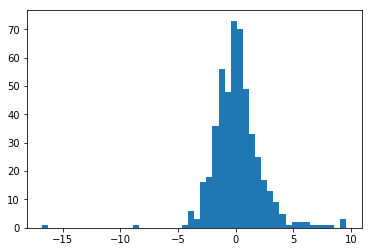

In [122]:
shares
plt.hist(shares['Day_Perc_Change'],bins=50)

### Query 2.6 
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

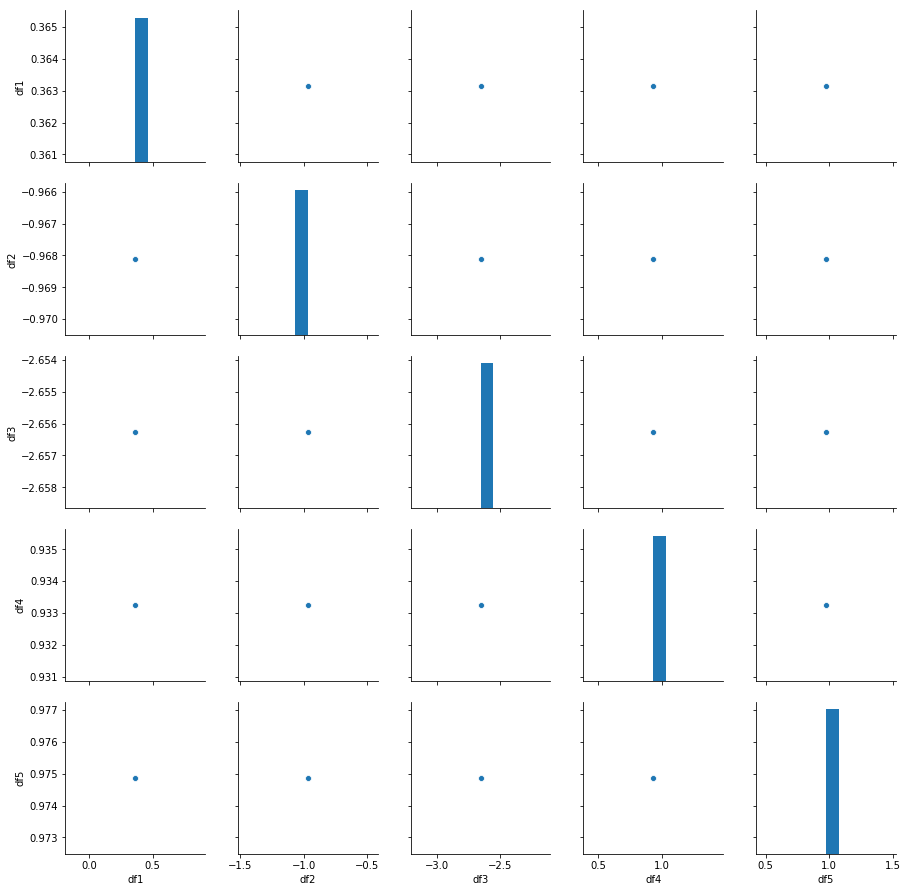

In [4]:
dfa=shares.iloc[1]
dfb=shares.iloc[2]
dfc=shares.iloc[3]
dfd=shares.iloc[4]
dfe=shares.iloc[5]
Perc_change=[{'df1':dfa['Day_Perc_Change'],'df2':dfb['Day_Perc_Change'],'df3':dfc['Day_Perc_Change'],'df4':dfd['Day_Perc_Change'],'df5':dfe['Day_Perc_Change']}]
a=pd.DataFrame(Perc_change)
a.corr()
sn.pairplot(a)

### Query 2.7 
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

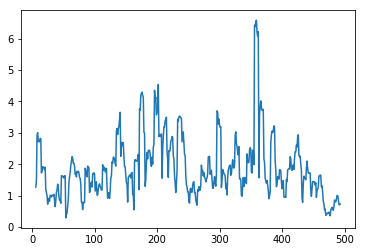

In [49]:
a=shares['Day_Perc_Change'].rolling(window=7)
volatility=a.std()
plt.plot(volatility)

### Query 2.8 
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E76F08A320>,
      dtype=object)

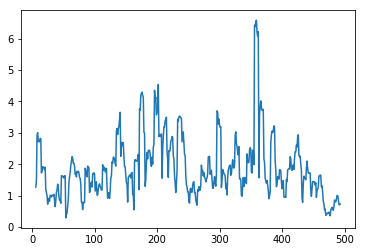

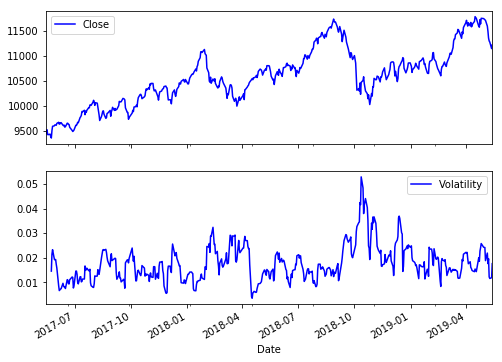

In [7]:
from pandas_datareader import data as web
a=shares['Day_Perc_Change'].rolling(window=7)
volatility=a.std()
plt.plot(volatility)
# Pull NIFTY data from Yahoo finance 
NIFTY = web.DataReader('^NSEI',data_source='yahoo',start='15/5/2017', end='13/5/2019')
# Compute the logarithmic returns using the Closing price 
NIFTY['Log_Ret'] = np.log(NIFTY['Close'] / NIFTY['Close'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
b=NIFTY['Log_Ret'].rolling(window=7)
NIFTY['volatility']=b.std()
NIFTY['Volatility']=NIFTY['volatility']* np.sqrt(7)
NIFTY[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))


### Query 2.9 
Trade Calls - Using Simple Moving Averages. Study about moving averages here. 
 
Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

sell 0
sell 1
sell 2
sell 3
sell 4
sell 5
sell 6
sell 7
sell 8
sell 9
sell 10
sell 11
sell 12
sell 13
sell 14
sell 15
sell 16
sell 17
sell 18
sell 19
sell 20
sell 21
sell 22
sell 23
sell 24
sell 25
sell 26
sell 27
sell 28
sell 29
sell 30
sell 31
sell 32
sell 33
sell 34
sell 35
sell 36
sell 37
sell 38
sell 39
sell 40
sell 41
sell 42
sell 43
sell 44
sell 45
sell 46
sell 47
sell 48
sell 49
sell 50
sell 51
sell 52
sell 53
sell 54
sell 55
sell 56
sell 57
sell 58
sell 59
sell 60
buy 61
buy 62
buy 63
buy 64
buy 65
buy 66
buy 67
buy 68
buy 69
buy 70
buy 71
buy 72
buy 73
buy 74
buy 75
buy 76
buy 77
buy 78
buy 79
buy 80
buy 81
buy 82
buy 83
buy 84
buy 85
buy 86
buy 87
buy 88
buy 89
buy 90
buy 91
buy 92
buy 93
buy 94
buy 95
buy 96
buy 97
buy 98
buy 99
buy 100
buy 101
buy 102
buy 103
buy 104
buy 105
buy 106
buy 107
buy 108
buy 109
buy 110
buy 111
buy 112
buy 113
buy 114
buy 115
buy 116
buy 117
buy 118
buy 119
buy 120
buy 121
buy 122
buy 123
buy 124
buy 125
buy 126
buy 127
buy 128
buy 129
buy 130
b

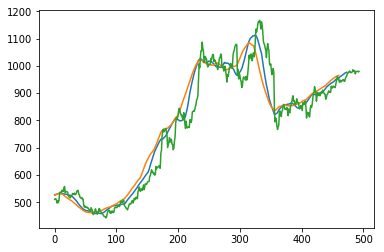

In [141]:
def smav(values,window):
    weights=np.repeat(1.0,window)/window
    smav=np.convolve(values,weights,'valid')
    return smav
smav21=smav(shares['Close Price'],21)
plt.plot(smav21)
smav34=smav(shares['Close Price'],34)
plt.plot(smav34)
avg=shares['Average Price']
plt.plot(avg)
a=smav21.shape
b=smav34.shape
size=min(a,b)
size1=size[0]
call
for i in range(size1):
    if(smav21[i]<smav34[i]):call='buy'
    else:call='sell'
         
    print(call,i)


In [102]:
shares

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,Day_Perc_Change,Trend
0,0,MINDTREE,EQ,2017-05-15,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,0.000000,Slight or No Change
1,1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,0.363137,Slight or No Change
2,2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,-0.968120,Slight Negative
3,3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017,-2.656265,Negative
4,4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017,0.933252,Slight positive
5,5,MINDTREE,EQ,2017-05-22,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,5,2017,0.974874,Slight positive
6,6,MINDTREE,EQ,2017-05-23,502.35,504.00,507.45,491.00,498.00,501.15,498.72,452893,2.258664e+08,8567,198703,43.87,5,2017,-0.238877,Slight or No Change
7,7,MINDTREE,EQ,2017-05-24,501.15,502.00,515.00,494.05,511.95,509.95,506.72,823967,4.175211e+08,15083,351179,42.62,5,2017,1.755961,Positive
8,8,MINDTREE,EQ,2017-05-25,509.95,513.70,549.50,508.45,542.50,543.90,532.14,1632427,8.686829e+08,25072,693340,42.47,5,2017,6.657515,Among top gainers
9,9,MINDTREE,EQ,2017-05-26,543.90,540.00,544.00,532.00,533.45,535.20,537.15,461613,2.479538e+08,12606,113087,24.50,5,2017,-1.599559,Negative


### Query 2.10 
Trade Calls - Using Bollinger Bands 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 
The 14 day rolling mean of the closing price (we call it the average) 
Upper band which is the rolling mean + 2 standard deviations away from the average. 
Lower band which is the rolling mean - 2 standard deviations away from the average. 
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 

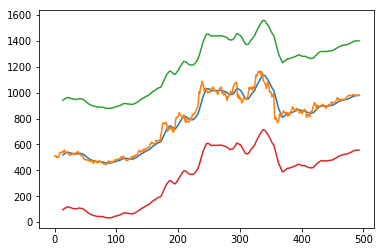

In [201]:
Close_Price=shares['Close Price'].rolling(window=14)
Avg=shares['Average Price']
roll_mean=Close_Price.mean()
std_dev=roll_mean.std()
avg=pd.DataFrame(roll_mean)
Upper_band=roll_mean+(2*std_dev)
Lower_band=roll_mean-(2*std_dev)
plt.plot(avg)
plt.plot(Avg)
plt.plot(Upper_band)
plt.plot(Lower_band)